In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

2021-09-24 09:18:40.867896: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-24 09:18:40.868014: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
dfs = [pd.read_csv('../input/heartbeat/mitbih_train.csv'),pd.read_csv('../input/heartbeat/mitbih_test.csv')]

In [4]:
for df in dfs:
    df.columns=list(range(len(df.columns)))

In [5]:
train = dfs[0].rename({187: 'Label'}, axis=1)
test = dfs[1].rename({187: 'Label'}, axis=1)

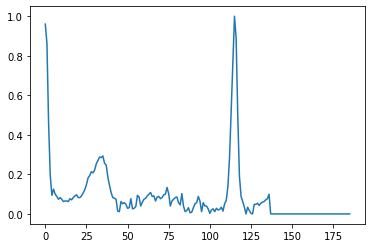

In [6]:
plt.plot(train.iloc[0,:186])

In [7]:
count=train['Label'].value_counts()
print(count)

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Label, dtype: int64


In [8]:
count=test['Label'].value_counts()
print(count)

0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Label, dtype: int64


In [9]:
from sklearn.utils import resample
df_1=train[train['Label']==1]
df_2=train[train['Label']==2]
df_3=train[train['Label']==3]
df_4=train[train['Label']==4]
df_0=(train[train['Label']==0]).sample(n=35000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=35000,random_state=42)
df_2_upsample=resample(df_2,replace=True,n_samples=35000,random_state=42)
df_3_upsample=resample(df_3,replace=True,n_samples=35000,random_state=42)
df_4_upsample=resample(df_4,replace=True,n_samples=35000,random_state=42)

train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [10]:
from sklearn.utils import resample
df_1=test[test['Label']==1]
df_2=test[test['Label']==2]
df_3=test[test['Label']==3]
df_4=test[test['Label']==4]
df_0=(test[test['Label']==0]).sample(n=15000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=15000,random_state=42)
df_2_upsample=resample(df_2,replace=True,n_samples=15000,random_state=42)
df_3_upsample=resample(df_3,replace=True,n_samples=15000,random_state=42)
df_4_upsample=resample(df_4,replace=True,n_samples=15000,random_state=42)

test=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [11]:
count=train['Label'].value_counts()
print(count)

0.0    35000
1.0    35000
2.0    35000
3.0    35000
4.0    35000
Name: Label, dtype: int64


In [12]:
count=test['Label'].value_counts()
print(count)

0.0    15000
1.0    15000
2.0    15000
3.0    15000
4.0    15000
Name: Label, dtype: int64


In [13]:
x_train=train.drop('Label',axis=1)
y_train=train['Label']

In [14]:
x_test=test.drop('Label',axis=1)
y_test=test['Label']

In [15]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knnpred = knn.predict(x_test)

In [16]:
def speci(kcm):
    total=sum(sum(kcm))
    sensitivity1 = kcm[0,0]/(kcm[0,0]+kcm[0,1]+kcm[0,2]+kcm[0,3]+kcm[0,4])
    print('Sensitivity of  Non-ecotic beats (normal beat) ', sensitivity1 )
    specificity1 = (kcm[1,1]+kcm[2,2]+kcm[3,3]+kcm[4,4])/(total-(kcm[0,0]+kcm[0,1]+kcm[0,2]+kcm[0,3]+kcm[0,4]))
    print('Specificity of  Non-ecotic beats (normal beat) ', specificity1)
    sensitivity1 = kcm[1,1]/(kcm[1,0]+kcm[1,1]+kcm[1,2]+kcm[1,3]+kcm[1,4])
    print('Sensitivity of  Supraventricular ectopic beats ', sensitivity1 )
    specificity1 = (kcm[0,0]+kcm[2,2]+kcm[3,3]+kcm[4,4])/(total-(kcm[1,0]+kcm[1,1]+kcm[1,2]+kcm[1,3]+kcm[1,4]))
    print('Specificity of  Supraventricular ectopic beats ', specificity1)
    sensitivity1 = kcm[2,2]/(kcm[2,0]+kcm[2,1]+kcm[2,2]+kcm[2,3]+kcm[2,4])
    print('Sensitivity of  Ventricular ectopic beats  ', sensitivity1 )
    specificity1 = (kcm[1,1]+kcm[0,0]+kcm[3,3]+kcm[4,4])/(total-(kcm[2,0]+kcm[2,1]+kcm[2,2]+kcm[2,3]+kcm[2,4]))
    print('Specificity of  Ventricular ectopic beats ', specificity1)
    sensitivity1 = kcm[3,3]/(kcm[3,0]+kcm[3,1]+kcm[3,2]+kcm[3,3]+kcm[3,4])
    print('Sensitivity of  Fusion Beats ', sensitivity1 )
    specificity1 = (kcm[1,1]+kcm[2,2]+kcm[0,0]+kcm[4,4])/(total-(kcm[3,0]+kcm[3,1]+kcm[3,2]+kcm[3,3]+kcm[3,4]))
    print('Specificity of  Fusion Beats ', specificity1)
    sensitivity1 = kcm[4,4]/(kcm[4,0]+kcm[4,1]+kcm[4,2]+kcm[4,3]+kcm[4,4])
    print('Sensitivity of  Unknown Beats ', sensitivity1 )
    specificity1 = (kcm[1,1]+kcm[2,2]+kcm[3,3]+kcm[0,0])/(total-(kcm[4,0]+kcm[4,1]+kcm[4,2]+kcm[4,3]+kcm[4,4]))
    print('Specificity of  Unknown Beats ', specificity1)
    

In [17]:
kcm = metrics.confusion_matrix(y_test, knnpred)
print(kcm)
print(metrics.classification_report(y_test, knnpred))
knnaccuracy = metrics.accuracy_score(y_test, knnpred)
print("Accuracy of KNN:",knnaccuracy)
speci(kcm)

[[14334   327   213    61    65]
 [ 2309 11969   519   150    53]
 [  328   103 14229   259    81]
 [ 1110   101  1649 12140     0]
 [  263    10    88     0 14639]]
              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86     15000
         1.0       0.96      0.80      0.87     15000
         2.0       0.85      0.95      0.90     15000
         3.0       0.96      0.81      0.88     15000
         4.0       0.99      0.98      0.98     15000

    accuracy                           0.90     75000
   macro avg       0.91      0.90      0.90     75000
weighted avg       0.91      0.90      0.90     75000

Accuracy of KNN: 0.89748
Sensitivity of  Non-ecotic beats (normal beat)  0.9556
Specificity of  Non-ecotic beats (normal beat)  0.88295
Sensitivity of  Supraventricular ectopic beats  0.7979333333333334
Specificity of  Supraventricular ectopic beats  0.9223666666666667
Sensitivity of  Ventricular ectopic beats   0.9486
Specificity of  Ventricu

In [18]:
from sklearn.svm import SVC  
svm = SVC()
svm.fit(x_train, y_train)
svmpred = svm.predict(x_test)

In [19]:
svmconfusion = metrics.confusion_matrix(y_test, svmpred)
print(svmconfusion)
print(metrics.classification_report(y_test, svmpred))
svmaccuracy = metrics.accuracy_score(y_test, svmpred)
print("Accuracy of SVM:",svmaccuracy)
speci(svmconfusion)

[[13595   678   160   512    55]
 [ 2122 12431   224   148    75]
 [  468    77 13789   613    53]
 [  281   101   662 13956     0]
 [  219    51    83     0 14647]]
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86     15000
         1.0       0.93      0.83      0.88     15000
         2.0       0.92      0.92      0.92     15000
         3.0       0.92      0.93      0.92     15000
         4.0       0.99      0.98      0.98     15000

    accuracy                           0.91     75000
   macro avg       0.92      0.91      0.91     75000
weighted avg       0.92      0.91      0.91     75000

Accuracy of SVM: 0.91224
Sensitivity of  Non-ecotic beats (normal beat)  0.9063333333333333
Specificity of  Non-ecotic beats (normal beat)  0.9137166666666666
Sensitivity of  Supraventricular ectopic beats  0.8287333333333333
Specificity of  Supraventricular ectopic beats  0.9331166666666667
Sensitivity of  Ventricular ectopic beats   0.919266

In [20]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)
svmpolypred = svclassifier.predict(x_test)

In [21]:
from sklearn import metrics
svmpolyconfusion = metrics.confusion_matrix(y_test, svmpolypred)
print(svmpolyconfusion)
print(metrics.classification_report(y_test, svmpolypred))
svmpolyaccuracy = metrics.accuracy_score(y_test, svmpolypred)
print("Accuracy of SVM:",svmpolyaccuracy)
speci(svmpolyconfusion)

[[14330   152   124   355    39]
 [ 4833  9583   435   111    38]
 [ 1132    61 13149   620    38]
 [ 2180     0   551 12269     0]
 [ 1106     0    62     9 13823]]
              precision    recall  f1-score   support

         0.0       0.61      0.96      0.74     15000
         1.0       0.98      0.64      0.77     15000
         2.0       0.92      0.88      0.90     15000
         3.0       0.92      0.82      0.87     15000
         4.0       0.99      0.92      0.96     15000

    accuracy                           0.84     75000
   macro avg       0.88      0.84      0.85     75000
weighted avg       0.88      0.84      0.85     75000

Accuracy of SVM: 0.8420533333333333
Sensitivity of  Non-ecotic beats (normal beat)  0.9553333333333334
Specificity of  Non-ecotic beats (normal beat)  0.8137333333333333
Sensitivity of  Supraventricular ectopic beats  0.6388666666666667
Specificity of  Supraventricular ectopic beats  0.89285
Sensitivity of  Ventricular ectopic beats   0.8766
S

In [22]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
svmrbfpred = svclassifier.predict(x_test)

In [23]:
svmrbfconfusion = metrics.confusion_matrix(y_test, svmrbfpred)
print(svmrbfconfusion)
print(metrics.classification_report(y_test, svmrbfpred))
svmrbfaccuracy = metrics.accuracy_score(y_test, svmrbfpred)
print("Accuracy of SVM:",svmrbfaccuracy)
speci(svmrbfconfusion)

[[13595   678   160   512    55]
 [ 2122 12431   224   148    75]
 [  468    77 13789   613    53]
 [  281   101   662 13956     0]
 [  219    51    83     0 14647]]
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86     15000
         1.0       0.93      0.83      0.88     15000
         2.0       0.92      0.92      0.92     15000
         3.0       0.92      0.93      0.92     15000
         4.0       0.99      0.98      0.98     15000

    accuracy                           0.91     75000
   macro avg       0.92      0.91      0.91     75000
weighted avg       0.92      0.91      0.91     75000

Accuracy of SVM: 0.91224
Sensitivity of  Non-ecotic beats (normal beat)  0.9063333333333333
Specificity of  Non-ecotic beats (normal beat)  0.9137166666666666
Sensitivity of  Supraventricular ectopic beats  0.8287333333333333
Specificity of  Supraventricular ectopic beats  0.9331166666666667
Sensitivity of  Ventricular ectopic beats   0.919266

In [24]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)
svmsigpred = svclassifier.predict(x_test)

In [25]:
from sklearn import metrics
svmsigconfusion = metrics.confusion_matrix(y_test, svmsigpred)
print(svmsigconfusion)
print(metrics.classification_report(y_test, svmsigpred))
svmsigaccuracy = metrics.accuracy_score(y_test, svmsigpred)
print("Accuracy of SVM:",svmsigaccuracy)
speci(svmsigconfusion)

[[5921  187  264  167 8461]
 [8055  430   71  110 6334]
 [5623  202 1175  574 7426]
 [2295    0  254 5461 6990]
 [8850    0   17   12 6121]]
              precision    recall  f1-score   support

         0.0       0.19      0.39      0.26     15000
         1.0       0.53      0.03      0.05     15000
         2.0       0.66      0.08      0.14     15000
         3.0       0.86      0.36      0.51     15000
         4.0       0.17      0.41      0.24     15000

    accuracy                           0.25     75000
   macro avg       0.48      0.25      0.24     75000
weighted avg       0.48      0.25      0.24     75000

Accuracy of SVM: 0.25477333333333335
Sensitivity of  Non-ecotic beats (normal beat)  0.3947333333333333
Specificity of  Non-ecotic beats (normal beat)  0.21978333333333333
Sensitivity of  Supraventricular ectopic beats  0.028666666666666667
Specificity of  Supraventricular ectopic beats  0.3113
Sensitivity of  Ventricular ectopic beats   0.07833333333333334
Specificit

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
nbpred = gnb.predict(x_test)

In [27]:
from sklearn import metrics
nbconfusion = metrics.confusion_matrix(y_test, nbpred)
print(nbconfusion)
print(metrics.classification_report(y_test, nbpred))
nbaccuracy = metrics.accuracy_score(y_test, nbpred)
print("Accuracy of NaiveBayes:",nbaccuracy)
speci(nbconfusion)

[[ 1699    56   946   526 11773]
 [ 1123  2157   890   580 10250]
 [ 1250    82  2966   153 10549]
 [    0     0    85  6632  8283]
 [   11     0    39    30 14920]]
              precision    recall  f1-score   support

         0.0       0.42      0.11      0.18     15000
         1.0       0.94      0.14      0.25     15000
         2.0       0.60      0.20      0.30     15000
         3.0       0.84      0.44      0.58     15000
         4.0       0.27      0.99      0.42     15000

    accuracy                           0.38     75000
   macro avg       0.61      0.38      0.35     75000
weighted avg       0.61      0.38      0.35     75000

Accuracy of NaiveBayes: 0.37832
Sensitivity of  Non-ecotic beats (normal beat)  0.11326666666666667
Specificity of  Non-ecotic beats (normal beat)  0.44458333333333333
Sensitivity of  Supraventricular ectopic beats  0.1438
Specificity of  Supraventricular ectopic beats  0.43695
Sensitivity of  Ventricular ectopic beats   0.19773333333333334
Sp

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)

In [29]:
rfcconfusion = metrics.confusion_matrix(y_test, rfcpred)
print(rfcconfusion)
print(metrics.classification_report(y_test, rfcpred))
rfcaccuracy = metrics.accuracy_score(y_test, rfcpred)
print("Accuracy of Randomforest:",rfcaccuracy)
speci(rfcconfusion)


[[14921    34    28    10     7]
 [ 4286 10661    30     0    23]
 [  884     9 13857   173    77]
 [ 3395     0  1452 10153     0]
 [  541     0    27     0 14432]]
              precision    recall  f1-score   support

         0.0       0.62      0.99      0.76     15000
         1.0       1.00      0.71      0.83     15000
         2.0       0.90      0.92      0.91     15000
         3.0       0.98      0.68      0.80     15000
         4.0       0.99      0.96      0.98     15000

    accuracy                           0.85     75000
   macro avg       0.90      0.85      0.86     75000
weighted avg       0.90      0.85      0.86     75000

Accuracy of Randomforest: 0.8536533333333334
Sensitivity of  Non-ecotic beats (normal beat)  0.9947333333333334
Specificity of  Non-ecotic beats (normal beat)  0.8183833333333334
Sensitivity of  Supraventricular ectopic beats  0.7107333333333333
Specificity of  Supraventricular ectopic beats  0.8893833333333333
Sensitivity of  Ventricular ecto

In [30]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dtpred = dt.predict(x_test)

In [31]:
dtconfusion = metrics.confusion_matrix(y_test, dtpred)
print(dtconfusion)
print(metrics.classification_report(y_test, dtpred))
dtaccuracy = metrics.accuracy_score(y_test, dtpred)
print("Accuracy of decision tree:",dtaccuracy)
speci(dtconfusion)

[[14432   251   182    46    89]
 [ 4192 10447   243    43    75]
 [ 1154   108 13364   237   137]
 [ 3108     0  1823 10069     0]
 [  674     8    95    10 14213]]
              precision    recall  f1-score   support

         0.0       0.61      0.96      0.75     15000
         1.0       0.97      0.70      0.81     15000
         2.0       0.85      0.89      0.87     15000
         3.0       0.97      0.67      0.79     15000
         4.0       0.98      0.95      0.96     15000

    accuracy                           0.83     75000
   macro avg       0.88      0.83      0.84     75000
weighted avg       0.88      0.83      0.84     75000

Accuracy of decision tree: 0.8336666666666667
Sensitivity of  Non-ecotic beats (normal beat)  0.9621333333333333
Specificity of  Non-ecotic beats (normal beat)  0.80155
Sensitivity of  Supraventricular ectopic beats  0.6964666666666667
Specificity of  Supraventricular ectopic beats  0.8679666666666667
Sensitivity of  Ventricular ectopic beats 